In [1]:
import pymongo
import pandas
from pprint import pprint

con = pymongo.MongoClient("mongodb://193.51.82.104:2343/")

horo = con.horodateurs
horo.collection_names()

['transactions_small', 'myresults', 'transactions', 'mobiliers']

In [3]:
mob = horo.mobiliers
list(mob.find(limit = 1))

[{'_id': ObjectId('56eaa4552d7eb34e4432e0fb'),
  'datasetid': 'horodateurs-mobiliers',
  'fields': {'adresse': '48 vis-à-vis RUE DE LISBONNE',
   'alim': 'SOLAIRE',
   'arrondt': 8,
   'geo_point_2d': [48.877489999731374, 2.311394999713242],
   'geo_shape': {'coordinates': [2.311394999713242, 48.877489999731374],
    'type': 'Point'},
   'modele': 'SAB3',
   'numhoro': 57080603,
   'objectid': 4383,
   'regime': 'MIX',
   'tarif': '4,00 E MIX 2U',
   'tarifhor': 4.0,
   'zoneres': '8J'},
  'geometry': {'coordinates': [2.311394999713242, 48.877489999731374],
   'type': 'Point'},
  'record_timestamp': '2015-12-02T17:49:46+00:00',
  'recordid': '698c75a21ba4f4c34e72f32ea1ecd94f9de8b88c'}]

In [7]:
mob.distinct("fields.alim")

['SOLAIRE', 'PILE']

In [9]:
res = mob.aggregate([
    { "$group": { "_id": "$fields.alim", "nb": { "$sum": 1 }}}
])
pandas.DataFrame(list(res))

,_id,nb
0,None,8
1,PILE,2994
2,SOLAIRE,4808


In [11]:
res = mob.aggregate([
    { "$group": { "_id": "$fields.arrondt", "nb": { "$sum": 1 }}}
])
pandas.DataFrame(list(res))

,_id,nb
0,1,87
1,6,174
2,3,133
3,11,440
4,12,458
5,10,197
6,14,448
7,2,67
8,15,810
9,17,698


In [63]:
res = mob.aggregate([
    { "$group": { "_id": { "arr": "$fields.arrondt", "reg": "$fields.regime"}, "nb": { "$sum": 1 }}},
    { "$project": { 
        "Arrondissement": "$_id.arr", "Régime": "$_id.reg", 
        "Nb Mobiliers": "$nb", "_id": 0
    }}
])
df = pandas.DataFrame(list(res))
df.head()

,Arrondissement,Nb Mobiliers,Régime
0,14,39,ROT
1,1,24,ROT
2,2,18,ROT
3,2,49,MIX
4,5,26,ROT


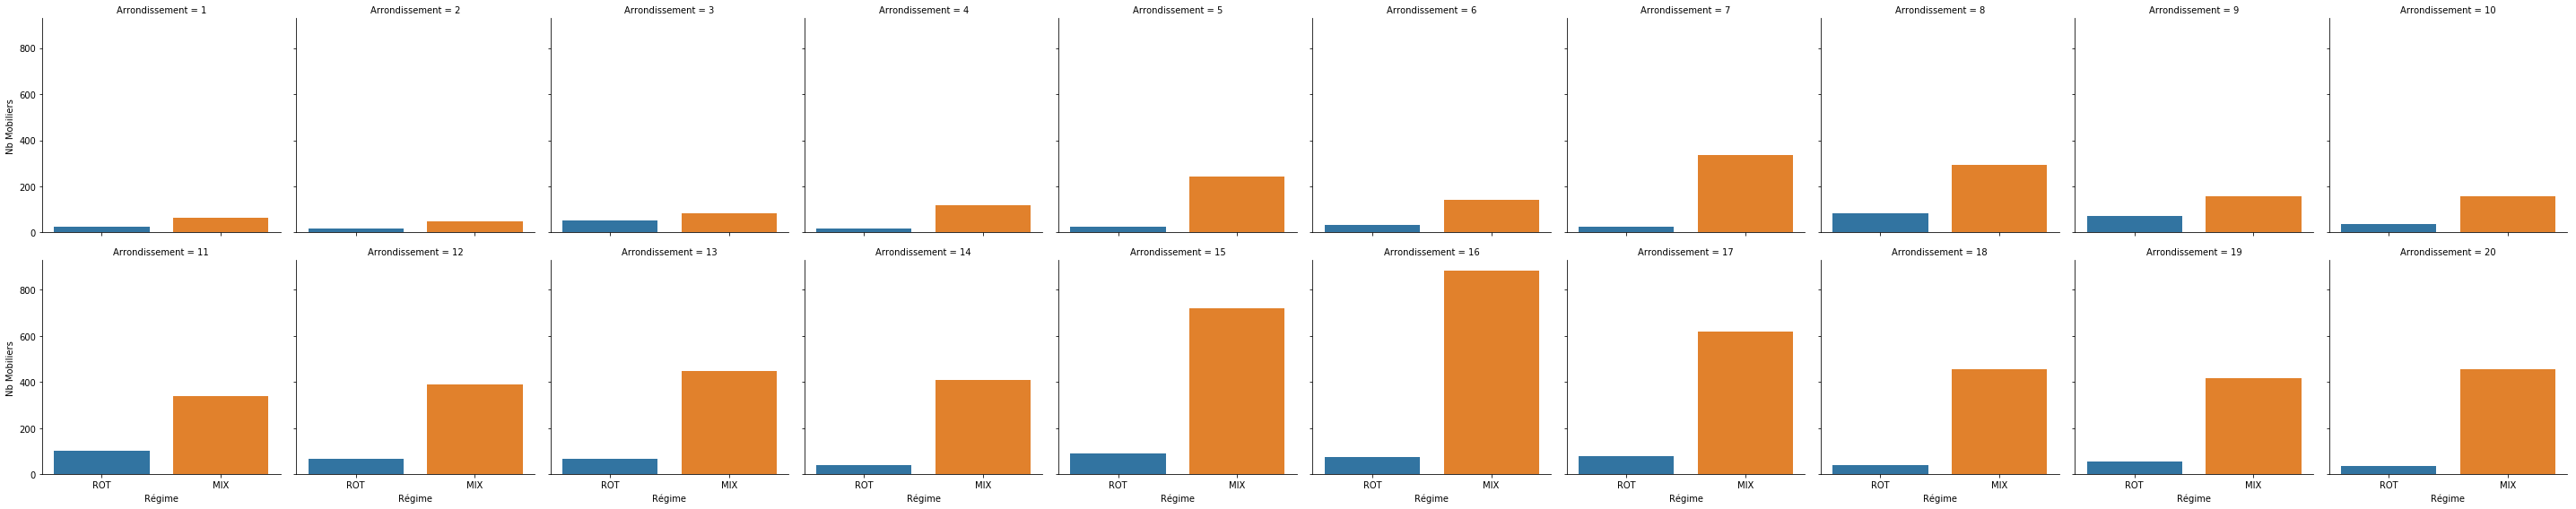

In [55]:
import seaborn
seaborn.factorplot(x = "Régime", y = "Nb Mobiliers", col = "Arrondissement", 
                   data = df, kind = "bar", col_wrap = 10)

In [64]:
df1 = pandas.crosstab(df["Arrondissement"], df["Régime"], 
                      values = df["Nb Mobiliers"], aggfunc = sum, normalize = "index")
# df1.head()

In [65]:
df2 = df1.reset_index()
# df2.head()

In [66]:
df3 = pandas.melt(df2, id_vars = "Arrondissement")
# df3.head()

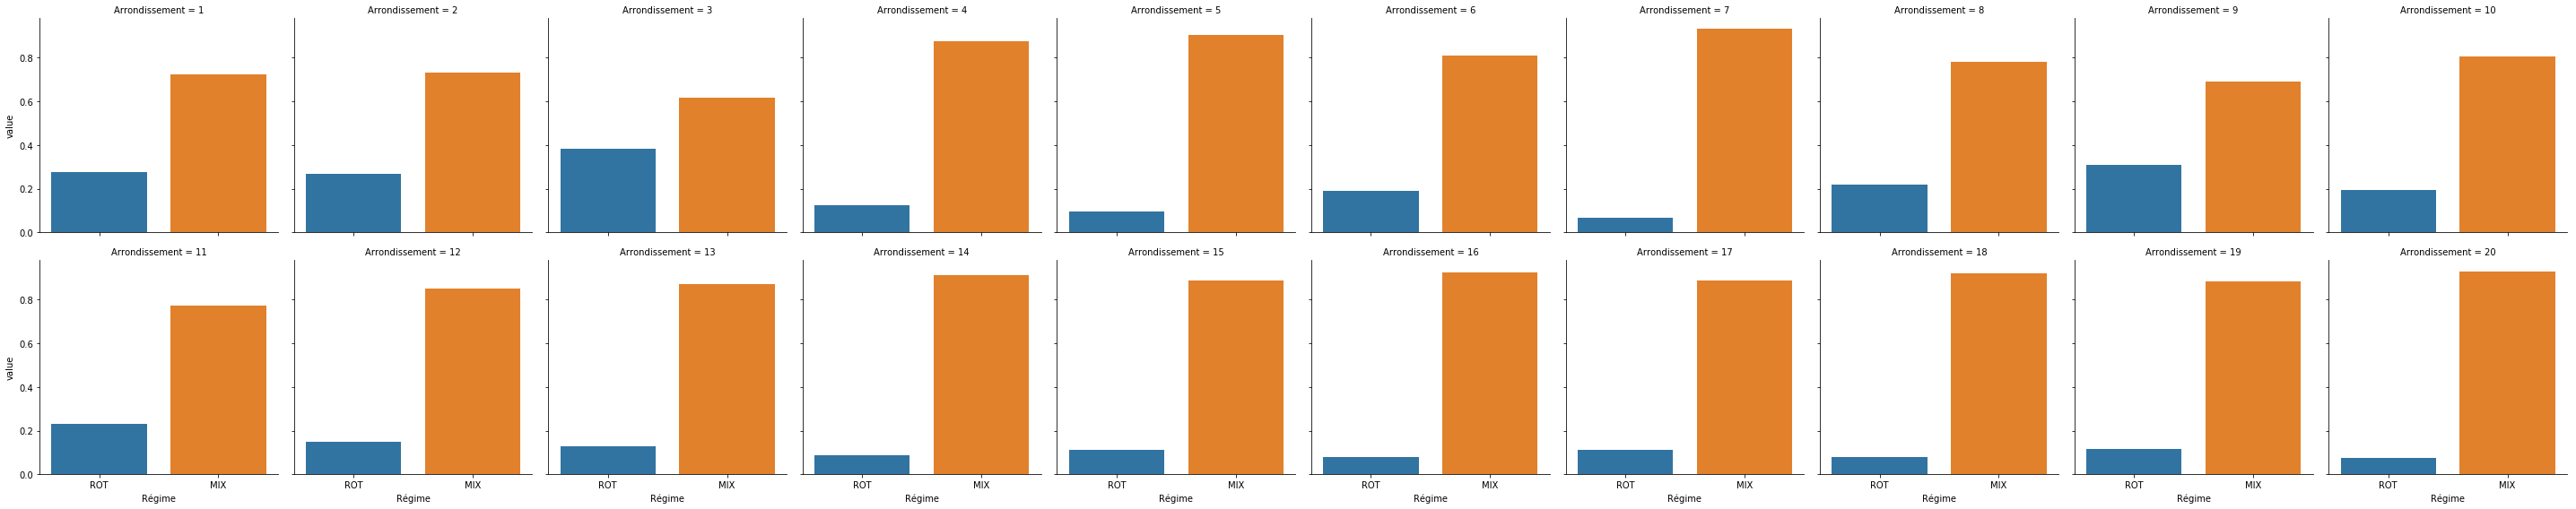

In [62]:
seaborn.factorplot(x = "Régime", y = "value", col = "Arrondissement", 
                   data = df3.sort_values(by = "Régime", ascending = False), 
                   kind = "bar", col_wrap = 10)